# Medical Data Visualizer from freeCodeCamp

## AJNF

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = df['weight'] / (df['height']/100)**2 > 25
df['overweight'] = df['overweight'].astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


# Draw Categorical Plot
def draw_cat_plot():
    df_cardio_0 = df[df['cardio'] == 0]
    df_cardio_1 = df[df['cardio'] == 1]
    
    del df_cardio_0['cardio']
    del df_cardio_1['cardio']

    chol_0 = df_cardio_0['cholesterol'].value_counts().tolist()[1]
    chol_1 = df_cardio_0['cholesterol'].value_counts().tolist()[0]

    gluc_0 = df_cardio_0['gluc'].value_counts().tolist()[1]
    gluc_1 = df_cardio_0['gluc'].value_counts().tolist()[0]

    smoke_0 = df_cardio_0['smoke'].value_counts().tolist()[1]
    smoke_1 = df_cardio_0['smoke'].value_counts().tolist()[0]

    alco_0 = df_cardio_0['alco'].value_counts().tolist()[1]
    alco_1 = df_cardio_0['alco'].value_counts().tolist()[0]

    active_0 = df_cardio_0['active'].value_counts().tolist()[1]
    active_1 = df_cardio_0['active'].value_counts().tolist()[0]

    overweight_0 = df_cardio_0['overweight'].value_counts().tolist()[1]
    overweight_1 = df_cardio_0['overweight'].value_counts().tolist()[0]

    chol_00 = df_cardio_1['cholesterol'].value_counts().tolist()[1]
    chol_11 = df_cardio_1['cholesterol'].value_counts().tolist()[0]

    gluc_00 = df_cardio_1['gluc'].value_counts().tolist()[1]
    gluc_11 = df_cardio_1['gluc'].value_counts().tolist()[0]

    smoke_00 = df_cardio_1['smoke'].value_counts().tolist()[1]
    smoke_11 = df_cardio_1['smoke'].value_counts().tolist()[0]

    alco_00 = df_cardio_1['alco'].value_counts().tolist()[1]
    alco_11 = df_cardio_1['alco'].value_counts().tolist()[0]

    active_00 = df_cardio_1['active'].value_counts().tolist()[1]
    active_11 = df_cardio_1['active'].value_counts().tolist()[0]

    overweight_00 = df_cardio_1['overweight'].value_counts().tolist()[1]
    overweight_11 = df_cardio_1['overweight'].value_counts().tolist()[0]
    
    column_list = df_cardio_0.columns.tolist()[7:13]
    count_list_0 = [chol_0,gluc_0,smoke_0,alco_0, active_0,overweight_0]
    count_list_1 = [chol_1,gluc_1,smoke_1,alco_1, active_1,overweight_1]

    column_list_0 = df_cardio_0.columns.tolist()[7:13]
    count_list_00 = [chol_00,gluc_00,smoke_00,alco_00, active_00,overweight_00]
    count_list_11 = [chol_11,gluc_11,smoke_11,alco_11, active_11,overweight_11]
    
    pd_plot_0 = pd.DataFrame({'variables': column_list, '0':count_list_0, '1':count_list_1})
    pd_plot_1 = pd.DataFrame({'variables': column_list_0, '0':count_list_00, '1':count_list_11})
    
    variables = pd_plot_0['variables'].tolist()
    values_0 = pd_plot_0['0'].tolist()
    values_1 = pd_plot_0['1'].tolist()

    X_axis = np.arange(len(variables))

    fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, sharex = True)

    plt.setp(axs, xticks=X_axis, xticklabels=variables)

    axs[0].bar(X_axis - 0.2,values_0  ,0.4, label = '0')
    axs[0].bar(X_axis + 0.2,values_1  ,0.4, label = '1')
    axs[0].set_title('cardio = 0')

    axs[1].bar(X_axis - 0.2,values_0  ,0.4)
    axs[1].bar(X_axis + 0.2,values_1  ,0.4)
    axs[1].set_title('cardio = 1')

    for ax in axs.flat:
        ax.set(xlabel='variable')

    plt.ylabel('total')
    fig.legend(loc=7)
    
    fig.savefig('catplot.png')
    return fig

# Draw Heat Map
def draw_heat_map():

    df_dummy = df.loc[(df['ap_lo'] <= df['ap_hi'])]
    df_dummy = df_dummy.loc[(df_dummy['height'] >= df_dummy['height'].quantile(0.025))]
    df_dummy = df_dummy.loc[(df_dummy['height'] <= df_dummy['height'].quantile(0.975))]
    df_dummy = df_dummy.loc[(df_dummy['weight'] >= df_dummy['weight'].quantile(0.025))]
    df_dummy = df_dummy.loc[(df_dummy['weight'] <= df_dummy['weight'].quantile(0.975))]
    
    
    fig, ax = plt.subplots(figsize=(9,7))
    mask = np.triu(np.ones_like(df_dummy.corr()))
    sns.heatmap(df_dummy.corr(),vmin=(-1*0.16), vmax=0.32, annot=True, fmt=".1f", mask = mask, linewidths = 0.4, ax = ax)
    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


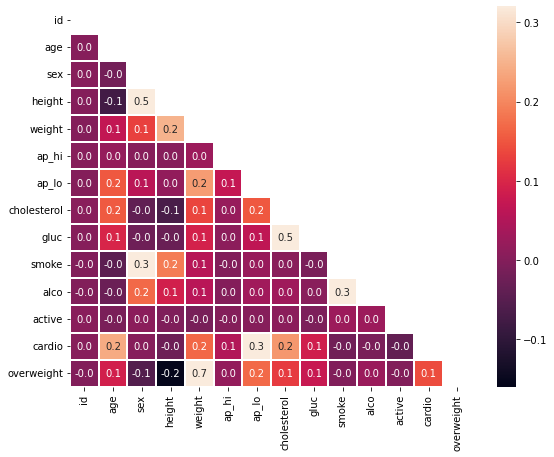

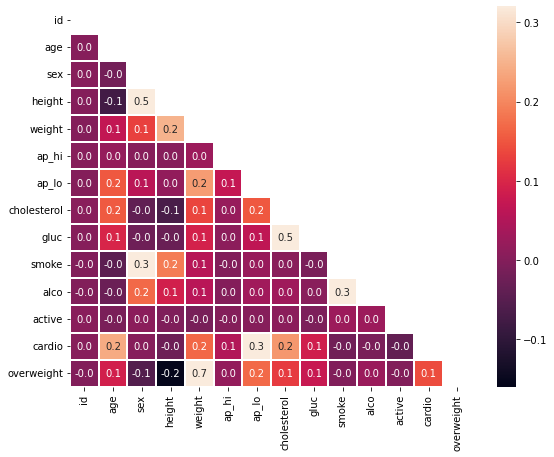

In [87]:
draw_heat_map()

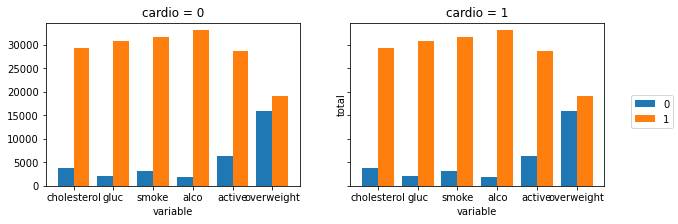

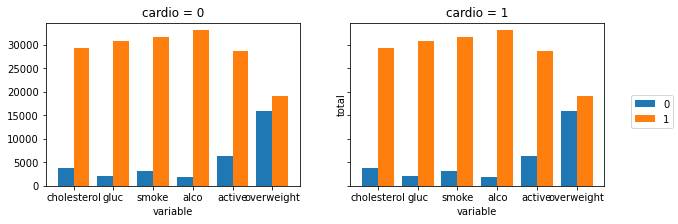

In [88]:
draw_cat_plot()